<a href="https://colab.research.google.com/github/Sona-12/PhD_Tasks/blob/main/IDC_breast_cancer_detection_K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting invasive ductal carcinoma in tissue slices


## Motivation

Invasive ductal carcinoma (IDC) is - with ~ 80 % of cases - one of the most common types of breast cancer. It's malicious and able to form metastases which makes it especially dangerous. Often a biopsy is done to remove small tissue samples. Then a pathologist has to decide whether a patient has IDC, another type of breast cancer or is healthy. In addition sick cells need to be located to find out how advanced the disease is and which grade should be assigned. This has to be done manually and is a time consuming process. Furthermore the decision depends on the expertise of the pathologist and his or her equipment. Therefor deep learning could be of great help to automatically detect and locate tumor tissue cells and to speed up the process. In order to exploit the full potential one could build a pipeline using massive amounts of tissue image data of various hospitals that were evaluated by different experts. This way one would be able to overcome the dependence on the pathologist which would be especially useful in regions where no experts are available .



## Description

The datasets consists of 162 whole mount slide images of Breast Cancer (BCa) specimens. There were then 277,524 patches of size 50 x 50 created from the original slide images. Each of the patches are labelled as IDC or non-IDC. The task will be to classify each image as Invasive Ductal Carcinoma (IDC) or Non-IDC using Machine Learning techniques such as Convolutional Neural Networks.




## What is meant by invasive ductal carcinoma? <a class="anchor" id="intro"></a>

<a title="Mikael Häggström, M.D. - Author info - Reusing images [CC BY (https://creativecommons.org/licenses/by/2.5)]" href="https://commons.wikimedia.org/wiki/File:Lobules_and_ducts_of_the_breast.jpg"><img width="309" alt="Lobules and ducts of the breast" style="float:left; margin:0px 15px 15px 15px" src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/47/Lobules_and_ducts_of_the_breast.jpg/256px-Lobules_and_ducts_of_the_breast.jpg"></a>


This illustration created [Mikael Häggström](https://commons.wikimedia.org/wiki/File:Lobules_and_ducts_of_the_breast.jpg) shows the anatomy of a healthy breast. Ductal carcinoma starts to develop in the ducts whereas lobular carcinoma has its origin in the lobules. Invasive carcinoma is able to leave its initial tissue compartment and can form metastases.

Original dataset link; https://www.kaggle.com/datasets/paultimothymooney/breast-histopathology-images

#Downloading the Dataset

Instructions:


1.   Make an account on Kaggle.com.
2.   Click on your profile picture and click on Settings from the drop-down menu.
3.   Scroll down to the API section.
4.   Click on the ‘Create New API Token’ button to download a fresh token as a JSON file having a username and API key.
5.   Copy the JSON file to ~/.kaggle/ the directory.
6.   Run the cell block below. Select the kaggle.json file from your computer when prompted.



In [ ]:
! pip install -q kaggle #installing required libraries

In [ ]:
from google.colab import files
files.upload() #upload your kaggle.json file

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kritikarajain","key":"51d3c3d38de52ec049f9654a2814f256"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/ #copy your kaggle.json file to ~/.kaggle/ directory
! chmod 600 ~/.kaggle/kaggle.json #security
! kaggle datasets download -d 'paultimothymooney/breast-histopathology-images'

100% 3.10G/3.10G [00:28<00:00, 148MB/s]
100% 3.10G/3.10G [00:28<00:00, 118MB/s]


In [ ]:
#unzip the data
 #unzip breast-histopathology-images.zip -d breast-histopathology-images
! unzip /content/drive/Shareddrives/IDC_Assignment/breast-histopathology-images.zip -d /content/drive/Shareddrives/IDC_Assignment/breast-histopathology-images

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/Shareddrives/IDC_Assignment/breast-histopathology-images/9023/0/9023_idx5_x501_y1401_class0.png  
  inflating: /content/drive/Shareddrives/IDC_Assignment/breast-histopathology-images/9023/0/9023_idx5_x501_y851_class0.png  
  inflating: /content/drive/Shareddrives/IDC_Assignment/breast-histopathology-images/9023/0/9023_idx5_x501_y951_class0.png  
  inflating: /content/drive/Shareddrives/IDC_Assignment/breast-histopathology-images/9023/0/9023_idx5_x51_y1051_class0.png  
  inflating: /content/drive/Shareddrives/IDC_Assignment/breast-histopathology-images/9023/0/9023_idx5_x51_y1151_class0.png  
  inflating: /content/drive/Shareddrives/IDC_Assignment/breast-histopathology-images/9023/0/9023_idx5_x51_y1201_class0.png  
  inflating: /content/drive/Shareddrives/IDC_Assignment/breast-histopathology-images/9023/0/9023_idx5_x51_y1251_class0.png  
  inflating: /content/drive/Shareddrives/IDC_Assignment/breast-histopatho

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Notebook source: https://www.kaggle.com/code/allunia/breast-cancer

# Preparation  <a class="anchor" id="prep"></a>

## Loading packages and setting <a class="anchor" id="setup"></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau, StepLR, CyclicLR
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.utils.class_weight import compute_class_weight


from glob import glob
from skimage.io import imread
from os import listdir

import time
import copy
from tqdm import tqdm_notebook as tqdm
#import all libraries
import torch.optim as optim
import torch
import torch.nn as nn
from torchvision import models
import numpy as np
import os
import sys
import pickle
import torch.nn.functional as F
import torch.utils.data as data
import pandas as pd
from torch.autograd import Variable
from torchvision import transforms
from tensorboardX import SummaryWriter
import math
from sklearn import metrics

### Settings

In [ ]:
run_training = False
retrain = False
find_learning_rate = False

## Exploring the data structure <a class="anchor" id="explorestructure"></a>

In [ ]:
files = listdir("/content/drive/Shareddrives/IDC_Assignment/breast-histopathology-images_01/")
print(len(files))

78


In [ ]:
files[0:10]

['10253',
 '10254',
 '10255',
 '10256',
 '10257',
 '10258',
 '10259',
 '10260',
 '10261',
 '10262']




In this folder we should find several images or a further substructure of folders.

These are patient ids. For each patient we have an individual subfolder that contains image patches.

### How many patients do we have?

In [ ]:
#base_path = "./breast-histopathology-images/IDC_regular_ps50_idx5/"
base_path = "/content/drive/Shareddrives/IDC_Assignment/breast-histopathology-images/IDC_regular_ps50_idx5/"
folder = listdir(base_path)
len(folder)

FileNotFoundError: ignored

There are total 279 patients in the given data.

### How many patches do we have in total?

Our algorithm needs to decide whether an image patch contains IDC or not. Consequently not the whole patient tissue slice but the single patches have to be considered as input to our algorithm. How many of them do we have in total?

In [ ]:
total_images = 0
for n in range(len(folder)):
    patient_id = folder[n]
    for c in [0, 1]:
        patient_path = base_path + patient_id
        #print(patient_path)
        class_path = patient_path + "/" + str(c) + "/"
        subfiles = listdir(class_path)
        total_images += len(subfiles)

In [ ]:
total_images

277524

There are approx. 280000 images. To feed the algorithm with image patches it would be nice to store the path of each image. This way we can load batches of images only one by one without storing the pixel values of all images.

### Storing the image_path, patient_id and the target

In [ ]:
data = pd.DataFrame(index=np.arange(0, total_images), columns=["patient_id", "path", "target"])

k = 0
for n in range(len(folder)):
    patient_id = folder[n]
    patient_path = base_path + patient_id
    for c in [0,1]:
        class_path = patient_path + "/" + str(c) + "/"
        subfiles = listdir(class_path)
        for m in range(len(subfiles)):
            image_path = subfiles[m]
            data.iloc[k]["path"] = class_path + image_path
            data.iloc[k]["target"] = c
            data.iloc[k]["patient_id"] = patient_id
            k += 1

data.head()

patient_id                                               path target
0      10253  /content/drive/Shareddrives/IDC_Assignment/bre...      0
1      10253  /content/drive/Shareddrives/IDC_Assignment/bre...      0
2      10253  /content/drive/Shareddrives/IDC_Assignment/bre...      0
3      10253  /content/drive/Shareddrives/IDC_Assignment/bre...      0
4      10253  /content/drive/Shareddrives/IDC_Assignment/bre...      0

# Exploratory analysis <a class="anchor" id="eda"></a>

## What do we know about our data? <a class="anchor" id="data"></a>

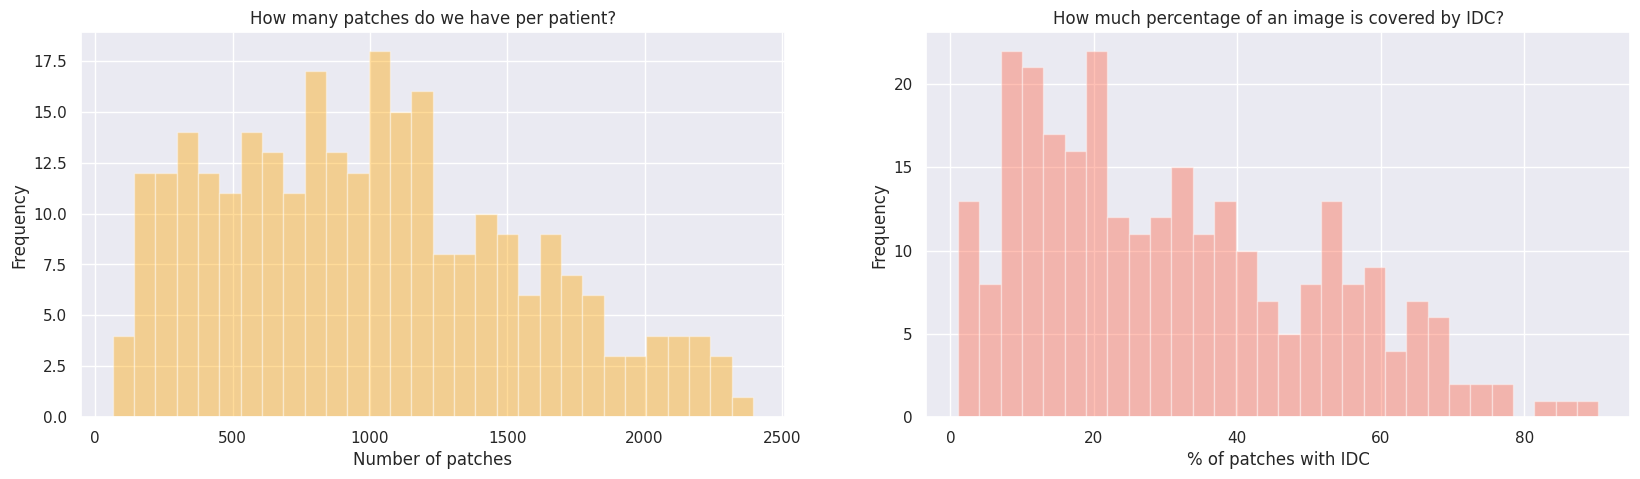

In [ ]:
cancer_perc = data.groupby("patient_id").target.value_counts()/ data.groupby("patient_id").target.size()
cancer_perc = cancer_perc.unstack()

fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(data.groupby("patient_id").size(), ax=ax[0], color="Orange", kde=False, bins=30)
ax[0].set_xlabel("Number of patches")
ax[0].set_ylabel("Frequency");
ax[0].set_title("How many patches do we have per patient?");
sns.distplot(cancer_perc.loc[:, 1]*100, ax=ax[1], color="Tomato", kde=False, bins=30)
ax[1].set_title("How much percentage of an image is covered by IDC?")
ax[1].set_ylabel("Frequency")
ax[1].set_xlabel("% of patches with IDC");


Text(0.5, 1.0, 'Target Distribution')

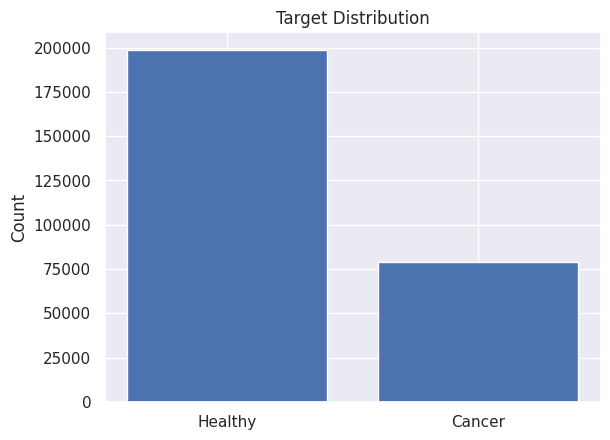

In [ ]:
target_vals = data['target'].value_counts().index.values

target_vals = target_vals.astype(str).tolist()
plt.bar(target_vals, data['target'].value_counts(), tick_label =['Healthy', 'Cancer'] )
plt.ylabel('Count')
plt.title('Target Distribution')

### Insights

1. The number of image patches per patient varies a lot.
2. Some patients have more than 80 % patches that show IDC! Consequently the tissue is full of cancer or only a part of the breast was covered by the tissue slice that is focused on the IDC cancer.
3. The **classes of IDC versus no IDC are imbalanced**. We have to check this again after setting up a validation strategy and find a strategy to deal with class weights.

**Class imbalance**

Class imbalance refers to an unequal distribution of classes within a dataset, particularly in the context of classification tasks. In a classification problem, classes represent different categories or labels that you're trying to predict based on input data. Class imbalance occurs when the number of instances in one or more classes is significantly lower than the number of instances in other classes.
The given dataset is highly class imbalanced. There are 198738 are healthy IDC data vs 78786 cancerous IDC data.

## Looking at healthy and cancer patches <a class="anchor" id="patches"></a>

In [ ]:
data.target = data.target.astype(np.int)

In [ ]:
pos_selection = np.random.choice(data[data.target==1].index.values, size=50, replace=False)
neg_selection = np.random.choice(data[data.target==0].index.values, size=50, replace=False)

### Cancer patches

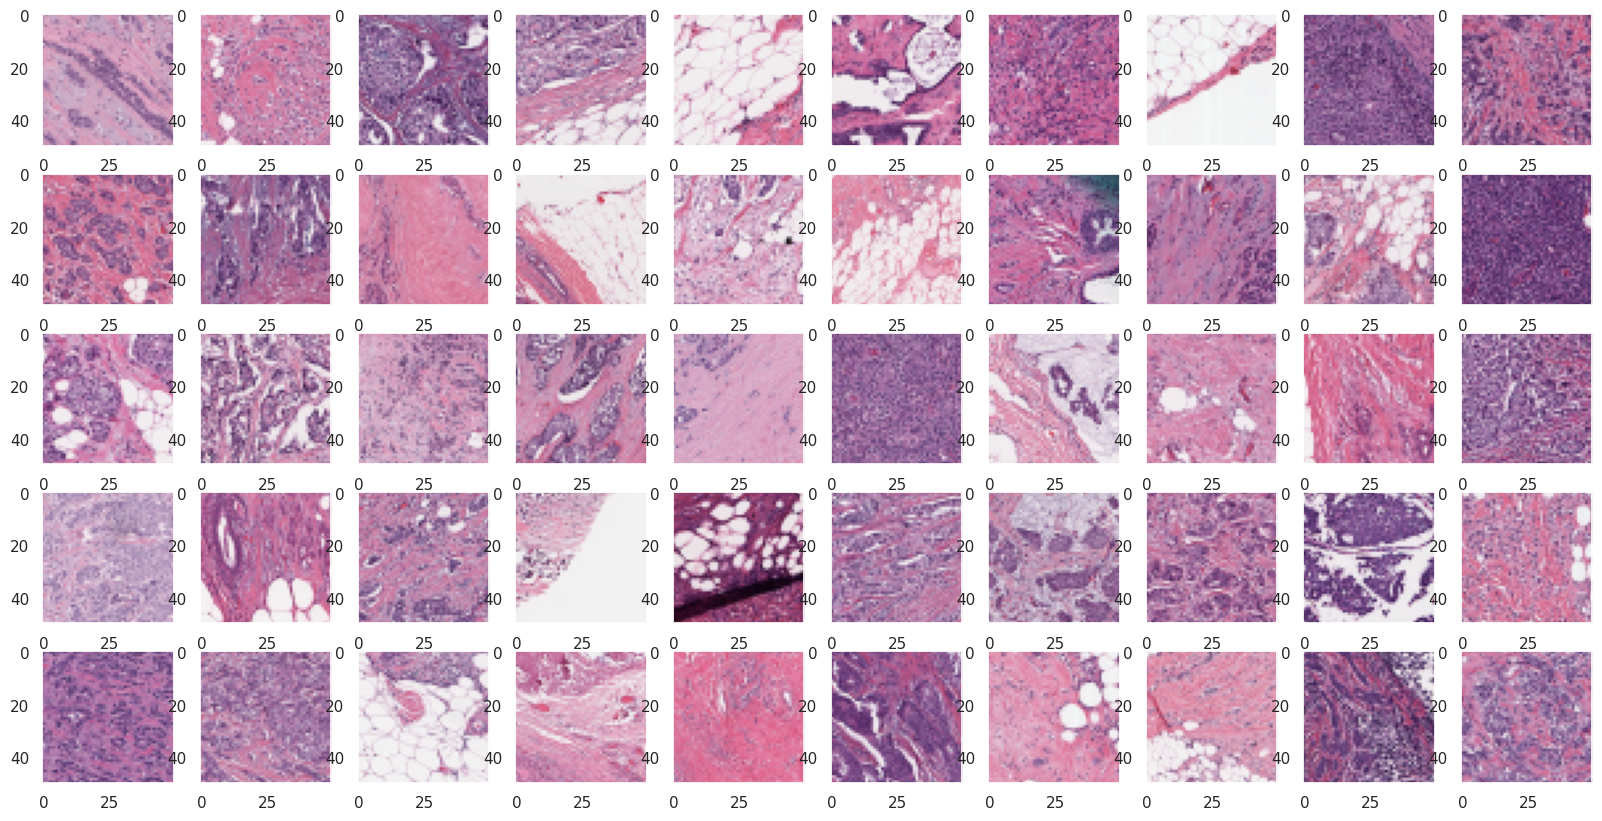

In [ ]:
fig, ax = plt.subplots(5,10,figsize=(20,10))

for n in range(5):
    for m in range(10):
        idx = pos_selection[m + 10*n]
        image = imread(data.loc[idx, "path"])
        ax[n,m].imshow(image)
        ax[n,m].grid(False)

### Healthy patches

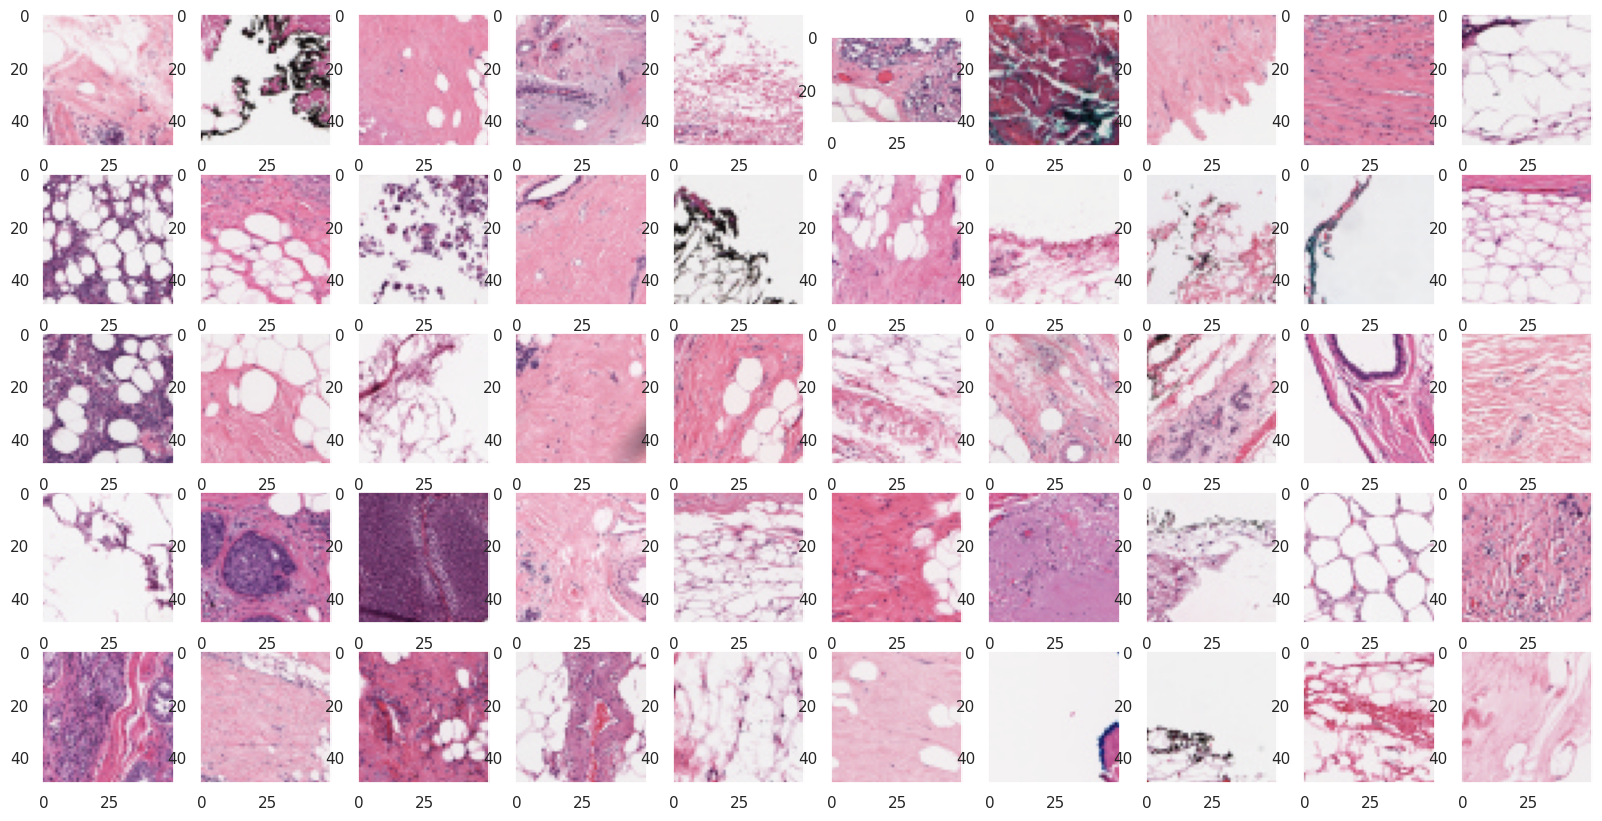

In [ ]:
fig, ax = plt.subplots(5,10,figsize=(20,10))

for n in range(5):
    for m in range(10):
        idx = neg_selection[m + 10*n]
        image = imread(data.loc[idx, "path"])
        ax[n,m].imshow(image)
        ax[n,m].grid(False)

In [ ]:
#helper functions
def extract_coords(df):
    coord = df.path.str.rsplit("_", n=4, expand=True)
    coord = coord.drop([0, 1, 4], axis=1)
    coord = coord.rename({2: "x", 3: "y"}, axis=1)
    coord.loc[:, "x"] = coord.loc[:,"x"].str.replace("x", "", case=False).astype(np.int)
    coord.loc[:, "y"] = coord.loc[:,"y"].str.replace("y", "", case=False).astype(np.int)
    df.loc[:, "x"] = coord.x.values
    df.loc[:, "y"] = coord.y.values
    return df

def get_cancer_dataframe(patient_id, cancer_id):
    path = base_path + patient_id + "/" + cancer_id
    files = listdir(path)
    dataframe = pd.DataFrame(files, columns=["filename"])
    path_names = path + "/" + dataframe.filename.values
    dataframe = dataframe.filename.str.rsplit("_", n=4, expand=True)
    dataframe.loc[:, "target"] = np.int(cancer_id)
    dataframe.loc[:, "path"] = path_names
    dataframe = dataframe.drop([0, 1, 4], axis=1)
    dataframe = dataframe.rename({2: "x", 3: "y"}, axis=1)
    dataframe.loc[:, "x"] = dataframe.loc[:,"x"].str.replace("x", "", case=False).astype(np.int)
    dataframe.loc[:, "y"] = dataframe.loc[:,"y"].str.replace("y", "", case=False).astype(np.int)
    return dataframe

def get_patient_dataframe(patient_id):
    df_0 = get_cancer_dataframe(patient_id, "0")
    df_1 = get_cancer_dataframe(patient_id, "1")
    patient_df = df_0.append(df_1)
    return patient_df

# Setting up the machine learning workflow <a class="anchor" id="workflow"></a>

## Settings <a class="anchor" id="ml_settings"></a>

In [ ]:
BATCH_SIZE = 32
NUM_CLASSES = 2

OUTPUT_PATH = ""
MODEL_PATH = "./breastcancermodel/"
LOSSES_PATH = "./breastcancermodel/"

In [ ]:
torch.manual_seed(0)
np.random.seed(0)

## Validation strategy using train/test split not kfold<a class="anchor" id="validation"></a>

Let's start very simple by selecting 30 % of the patients as test data and the remaining 70 % for training and developing.

In [ ]:
data.head()
data.loc[:, "target"] = data.target.astype(np.str)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277524 entries, 0 to 277523
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   patient_id  277524 non-null  object
 1   path        277524 non-null  object
 2   target      277524 non-null  object
dtypes: object(3)
memory usage: 16.5+ MB


In [ ]:
patients = data.patient_id.unique()

train_ids, sub_test_ids = train_test_split(patients,
                                           test_size=0.3,
                                           random_state=0)
test_ids, dev_ids = train_test_split(sub_test_ids, test_size=0.5, random_state=0)

In [ ]:
print(len(train_ids)/patients.shape[0]*100, len(dev_ids)/patients.shape[0]*100, len(test_ids)/patients.shape[0]*100)

69.89247311827957 15.053763440860216 15.053763440860216


Now it's 70 % train and 15 % for dev and test.

In [ ]:
print(len(train_ids), len(dev_ids), len(test_ids))

195 42 42


In [ ]:
train_df = data.loc[data.patient_id.isin(train_ids),:].copy()
test_df = data.loc[data.patient_id.isin(test_ids),:].copy()
dev_df = data.loc[data.patient_id.isin(dev_ids),:].copy()

train_df = extract_coords(train_df)
test_df = extract_coords(test_df)
dev_df = extract_coords(dev_df)

## Target distributions <a class="anchor" id="target_dists"></a>

Let's take a look at the target distribution difference of the datasets:

Text(0.5, 1.0, 'Target Distribution Train Set')

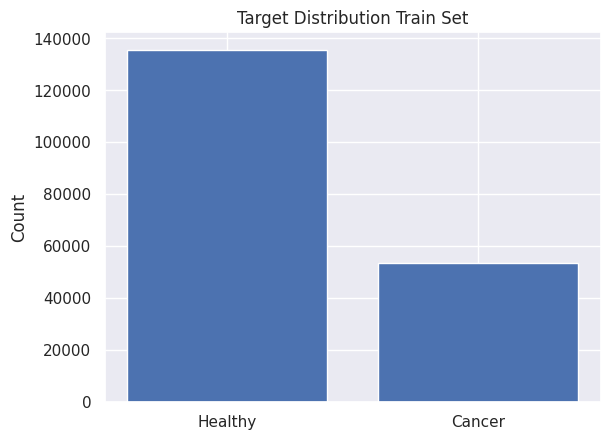

In [ ]:
target_vals = train_df.target.value_counts().index.values
target_vals = target_vals.astype(str).tolist()
plt.bar(target_vals, train_df.target.value_counts() , tick_label =['Healthy', 'Cancer'] )
plt.ylabel('Count')
plt.title('Target Distribution Train Set')

Text(0.5, 1.0, 'Target Distribution Development Set')

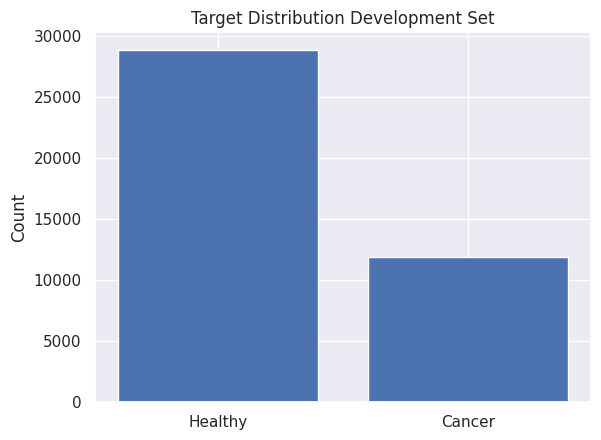

In [ ]:
target_vals = dev_df.target.value_counts().index.values
target_vals = target_vals.astype(str).tolist()
plt.bar(target_vals, dev_df.target.value_counts() , tick_label =['Healthy', 'Cancer'] )
plt.ylabel('Count')
plt.title('Target Distribution Development Set')

In [ ]:
target_vals = test_df.target.value_counts().index.values
target_vals = target_vals.astype(str).tolist()
plt.bar(target_vals, test_df.target.value_counts(), tick_label =['Healthy', 'Cancer'] )
plt.ylabel('Count')
plt.title('Target Distribution Test Set')

#Advanced

## Creating pytorch image datasets <a class="anchor" id="image_datasets"></a>



In [ ]:
def my_transform(key="train", plot=False):
    train_sequence = [transforms.Resize((50,50)),
                      transforms.RandomHorizontalFlip(),
                      transforms.RandomVerticalFlip()]
    val_sequence = [transforms.Resize((50,50))]
    if plot==False:
        train_sequence.extend([
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
        val_sequence.extend([
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

    data_transforms = {'train': transforms.Compose(train_sequence),'val': transforms.Compose(val_sequence)}
    return data_transforms[key]

In [ ]:
class BreastCancerDataset(Dataset):

    def __init__(self, df, transform=None):
        self.states = df
        self.transform=transform

    def __len__(self):
        return len(self.states)

    def __getitem__(self, idx):
        patient_id = self.states.patient_id.values[idx]
        x_coord = self.states.x.values[idx]
        y_coord = self.states.y.values[idx]
        image_path = self.states.path.values[idx]
        image = Image.open(image_path)
        image = image.convert('RGB')

        if self.transform:
            image = self.transform(image)

        if "target" in self.states.columns.values:
            target = np.int(self.states.target.values[idx])
        else:
            target = None

        return {"image": image,
                "label": target,
                "patient_id": patient_id,
                "x": x_coord,
                "y": y_coord}

In [ ]:
train_dataset = BreastCancerDataset(train_df, transform=my_transform(key="train"))
dev_dataset = BreastCancerDataset(dev_df, transform=my_transform(key="val"))
test_dataset = BreastCancerDataset(test_df, transform=my_transform(key="val"))

In [ ]:
image_datasets = {"train": train_dataset, "dev": dev_dataset, "test": test_dataset}
dataset_sizes = {x: len(image_datasets[x]) for x in ["train", "dev", "test"]}

In [ ]:

train_transform = my_transform(key="train", plot=True)
val_transform = my_transform(key="val", plot=True)


For validation we have only used the image resizing.

## Creating pytorch dataloaders <a class="anchor" id="dataloaders"></a>

As the gradients for each learning step are computed over batches we benefit from shuffling the training data after each epoch. This way each batch is composed differently and we don't start to learn for specific sequences of images. For validation and training we drop the last batch that often consists less images than the batch size.

In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
dev_dataloader = DataLoader(dev_dataset, batch_size=BATCH_SIZE, shuffle=False, drop_last=True)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, drop_last=False)

In [ ]:
dataloaders = {"train": train_dataloader, "dev": dev_dataloader, "test": test_dataloader}

In [ ]:
print(len(dataloaders["train"]), len(dataloaders["dev"]), len(dataloaders["test"]))

5973 1181 1518


## Defining the model structure <a class="anchor" id="model_structure"></a>

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

Our dataset is very small and we should be afraid of overfitting to our patients. For this reason it can be a good idea to use transfer learning with a pretrained CNN. This way we benefit from the fact that the first layers of a pretrained CNN extract basic features like edges for example and only last layers contain very problem specific features. Again our policy is to start simple by using a small network like resnet18:

In [ ]:
run_training=True
model = torchvision.models.resnet18(pretrained=True)
if run_training:

    models.resnet18(pretrained=True)
num_features = model.fc.in_features
print(num_features)

model.fc = nn.Sequential(
    nn.Linear(num_features, 512),
    nn.ReLU(),
    nn.BatchNorm1d(512),
    nn.Dropout(0.5),

    nn.Linear(512, 256),
    nn.ReLU(),
    nn.BatchNorm1d(256),
    nn.Dropout(0.5),

    nn.Linear(256, NUM_CLASSES))

def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0.01)

model.apply(init_weights)
model = model.to(device)

512


## Setting up the loss function <a class="anchor" id="loss"></a>

The task to predict the presence of inasive ductal carcinoma given a tissue patch is a binary classification. A common loss for this problem is the binary cross entropy function. Using it we could only use one single output neuron to make predictions. As I like to compute the f1-score during training and prediction and I need to compute false and true positives/negatives in a simple manner I will use the cross entropy loss with K=2 output neurons or 2 classes that can be hot (1) or cold (0) with $\sum_{k}y_{nk}=1$:

$$ L = -\sum_{n=1}^{N} \sum_{k=1}^{K=2} w_{k} \cdot t_{n,k} \cdot \ln (y_{nk})$$

The $w_{k}$ are used to weight the positive and negative classes such that we are able to deal with the class imbalance. In our case we have much more negative (healthy) patches than those with cancer. To deal with this imbalance we like to increase the impact of the gradients of positive cases during training and we can do so with a higher weight than for the negative cases.

In [ ]:
weights = compute_class_weight(y=train_df.target.values, class_weight="balanced", classes=train_df.target.unique())
class_weights = torch.FloatTensor(weights)
if device.type=="cuda":
    class_weights = class_weights.cuda()
print(class_weights)

tensor([0.7027, 1.7331], device='cuda:0')


In [ ]:
train_df.target.unique()

array(['0', '1'], dtype=object)

You can see that class 1 (positive cancer) has a higher weight.

In [ ]:
criterion = nn.CrossEntropyLoss(weight=class_weights)

## Building the training loop without k-fold<a class="anchor" id="train_loop"></a>

In [ ]:
def train_loop(model, criterion, optimizer, lr_find=False, scheduler=None, num_epochs = 3, lam=0.0):
    since = time.time()
    if lr_find:
        phases = ["train"]
    else:
        phases = ["train", "dev", "test"]

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    loss_dict = {"train": [], "dev": [], "test": []}
    lam_tensor = torch.tensor(lam, device=device)

    running_loss_dict = {"train": [], "dev": [], "test": []}

    lr_find_loss = []
    lr_find_lr = []
    smoothing = 0.2

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        for phase in phases:
            if phase == "train":
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            tk0 = tqdm(dataloaders[phase], total=int(len(dataloaders[phase])))

            counter = 0
            for bi, d in enumerate(tk0):
                inputs = d["image"]
                labels = d["label"]
                inputs = inputs.to(device, dtype=torch.float)
                labels = labels.to(device, dtype=torch.long)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()

                        #l2_reg = torch.tensor(0., device=device)
                        #for param in model.parameters():
                            #l2_reg = lam_tensor * torch.norm(param)

                        #loss += l2_reg

                        optimizer.step()
                        # cyclical lr schedule is invoked after each batch
                        if scheduler is not None:
                            scheduler.step()
                            if lr_find:
                                lr_step = optimizer.state_dict()["param_groups"][0]["lr"]
                                lr_find_lr.append(lr_step)
                                if counter==0:
                                    lr_find_loss.append(loss.item())
                                else:
                                    smoothed_loss = smoothing  * loss.item() + (1 - smoothing) * lr_find_loss[-1]
                                    lr_find_loss.append(smoothed_loss)

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

                counter += 1


                tk0.set_postfix({'loss': running_loss / (counter * dataloaders[phase].batch_size),
                                 'accuracy': running_corrects.double() / (counter * dataloaders[phase].batch_size)})
                running_loss_dict[phase].append(running_loss / (counter * dataloaders[phase].batch_size))

            epoch_loss = running_loss / dataset_sizes[phase]
            loss_dict[phase].append(epoch_loss)
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'dev' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
    time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    results = {"model": model,
               "loss_dict": loss_dict,
               "running_loss_dict": running_loss_dict,
               "lr_find": {"lr": lr_find_lr, "loss": lr_find_loss}}
    return results

## Searching for an optimal cyclical learning rate <a class="anchor" id="lr_cycle_optima"></a>


In [ ]:
start_lr = 1e-6
end_lr = 0.1

In [ ]:
def get_lr_search_scheduler(optimizer, min_lr, max_lr, max_iterations):
    # max_iterations should be the number of steps within num_epochs_*epoch_iterations
    # this way the learning rate increases linearily within the period num_epochs*epoch_iterations
    scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer=optimizer,
                                               base_lr=min_lr,
                                               max_lr=max_lr,
                                               step_size_up=max_iterations,
                                               step_size_down=max_iterations,
                                               mode="triangular")

    return scheduler

def get_scheduler(optimiser, min_lr, max_lr, stepsize):
    # suggested_stepsize = 2*num_iterations_within_epoch
    stepsize_up = np.int(stepsize/2)
    scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer=optimiser,
                                               base_lr=min_lr,
                                               max_lr=max_lr,
                                               step_size_up=stepsize_up,
                                               step_size_down=stepsize_up,
                                               mode="triangular")
    return scheduler

In [ ]:
import math
find_learning_rate = True
if find_learning_rate:
    lr_find_epochs=1
    optimizer = optim.SGD(model.fc.parameters(), start_lr)
    scheduler = get_lr_search_scheduler(optimizer, start_lr, end_lr, lr_find_epochs*len(train_dataloader))
    results = train_loop(model, criterion, optimizer, lr_find=True, scheduler=scheduler, num_epochs=lr_find_epochs)
    lr_find_lr, lr_find_loss = results["lr_find"]["lr"], results["lr_find"]["loss"]

    find_lr_df = pd.DataFrame(lr_find_loss, columns=["smoothed loss"])
    find_lr_df.loc[:, "lr"] = lr_find_lr
    find_lr_df.to_csv("learning_rate_search.csv", index=False)
else:
    find_lr_df = pd.read_csv(MODEL_PATH + "learning_rate_search.csv")

Epoch 0/0
----------


  0%|          | 0/5973 [00:00<?, ?it/s]

train Loss: 0.6052 Acc: 0.7429

Training complete in 6m 56s
Best val Acc: 0.000000


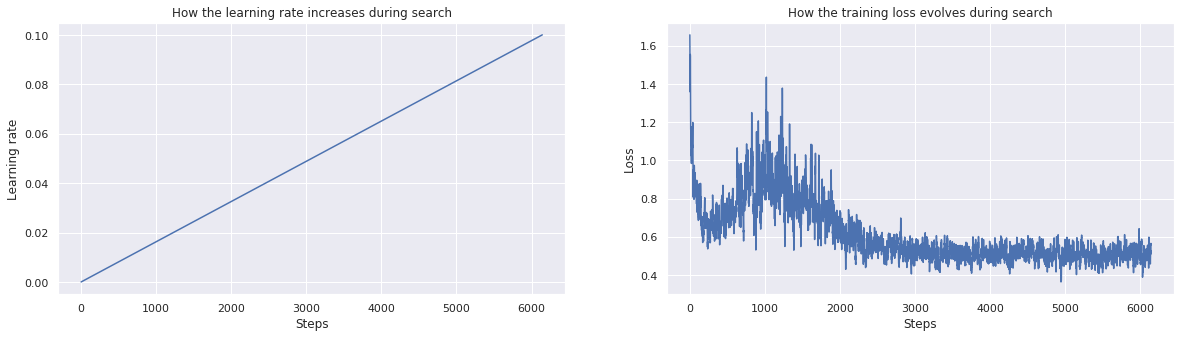

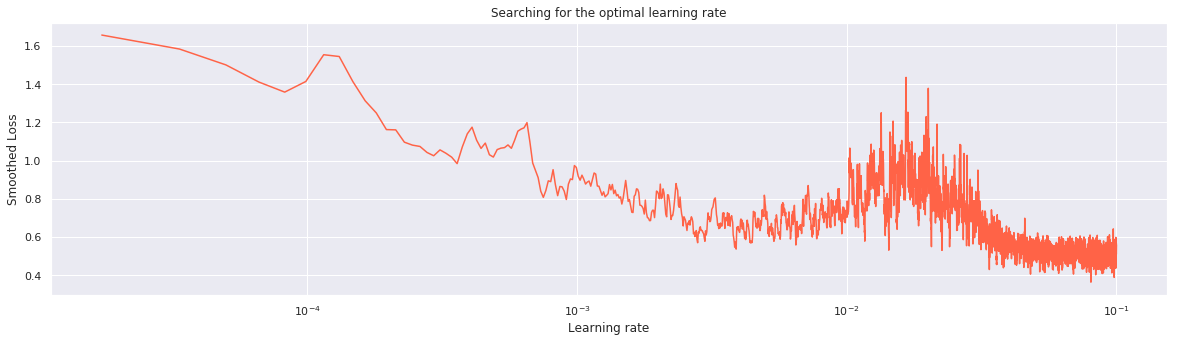

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
ax[0].plot(find_lr_df.lr.values)
ax[1].plot(find_lr_df["smoothed loss"].values)
ax[0].set_xlabel("Steps")
ax[0].set_ylabel("Learning rate")
ax[1].set_xlabel("Steps")
ax[1].set_ylabel("Loss");
ax[0].set_title("How the learning rate increases during search")
ax[1].set_title("How the training loss evolves during search")

plt.figure(figsize=(20,5))
plt.plot(find_lr_df.lr.values, find_lr_df["smoothed loss"].values, '-', color="tomato");
plt.xlabel("Learning rate")
plt.xscale("log")
plt.ylabel("Smoothed Loss")
plt.title("Searching for the optimal learning rate");

In [ ]:
start_lr = 1e-6
end_lr = 0.006

## Performing the training wihtout kfold <a class="anchor" id="run"></a>

In [ ]:
if run_training:
    NUM_EPOCHS = 30
    optimizer = optim.SGD(model.fc.parameters(), lr=0.01)
    scheduler = get_scheduler(optimizer, start_lr, end_lr, 2*NUM_EPOCHS)
    results = train_loop(model, criterion, optimizer, scheduler=scheduler, num_epochs = NUM_EPOCHS)
    model, loss_dict, running_loss_dict = results["model"], results["loss_dict"], results["running_loss_dict"]

    if device == "cpu":
        OUTPUT_PATH += ".pth"
    else:
        OUTPUT_PATH += "_cuda.pth"

    torch.save(model.state_dict(), OUTPUT_PATH)

    losses_df = pd.DataFrame(loss_dict["train"],columns=["train"])
    losses_df.loc[:, "dev"] = loss_dict["dev"]
    losses_df.loc[:, "test"] = loss_dict["test"]
    losses_df.to_csv("losses_breastcancer.csv", index=False)

    running_losses_df = pd.DataFrame(running_loss_dict["train"], columns=["train"])
    running_losses_df.loc[0:len(running_loss_dict["dev"])-1, "dev"] = running_loss_dict["dev"]
    running_losses_df.loc[0:len(running_loss_dict["test"])-1, "test"] = running_loss_dict["test"]
    running_losses_df.to_csv("running_losses_breastcancer.csv", index=False)
else:
    if device == "cpu":
        load_path = MODEL_PATH + ".pth"
    else:
        load_path = MODEL_PATH + "_cuda.pth"
    model.load_state_dict(torch.load(load_path, map_location='cpu'))
    model.eval()

    losses_df = pd.read_csv(LOSSES_PATH + "losses_breastcancer.csv")
    running_losses_df = pd.read_csv(LOSSES_PATH + "running_losses_breastcancer.csv")

# Exploring results and errors <a class="anchor" id="error_analysis"></a>

## Loss convergence <a class="anchor" id="losses"></a>

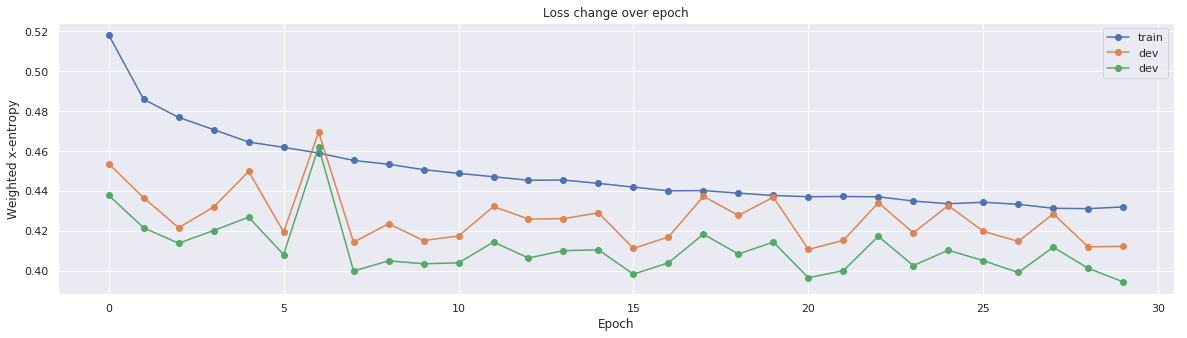

In [ ]:
plt.figure(figsize=(20,5))

plt.plot(losses_df["train"], '-o', label="train")
plt.plot(losses_df["dev"], '-o', label="dev")
plt.plot(losses_df["test"], '-o', label="dev")
plt.xlabel("Epoch")
plt.ylabel("Weighted x-entropy")
plt.title("Loss change over epoch")
plt.legend();

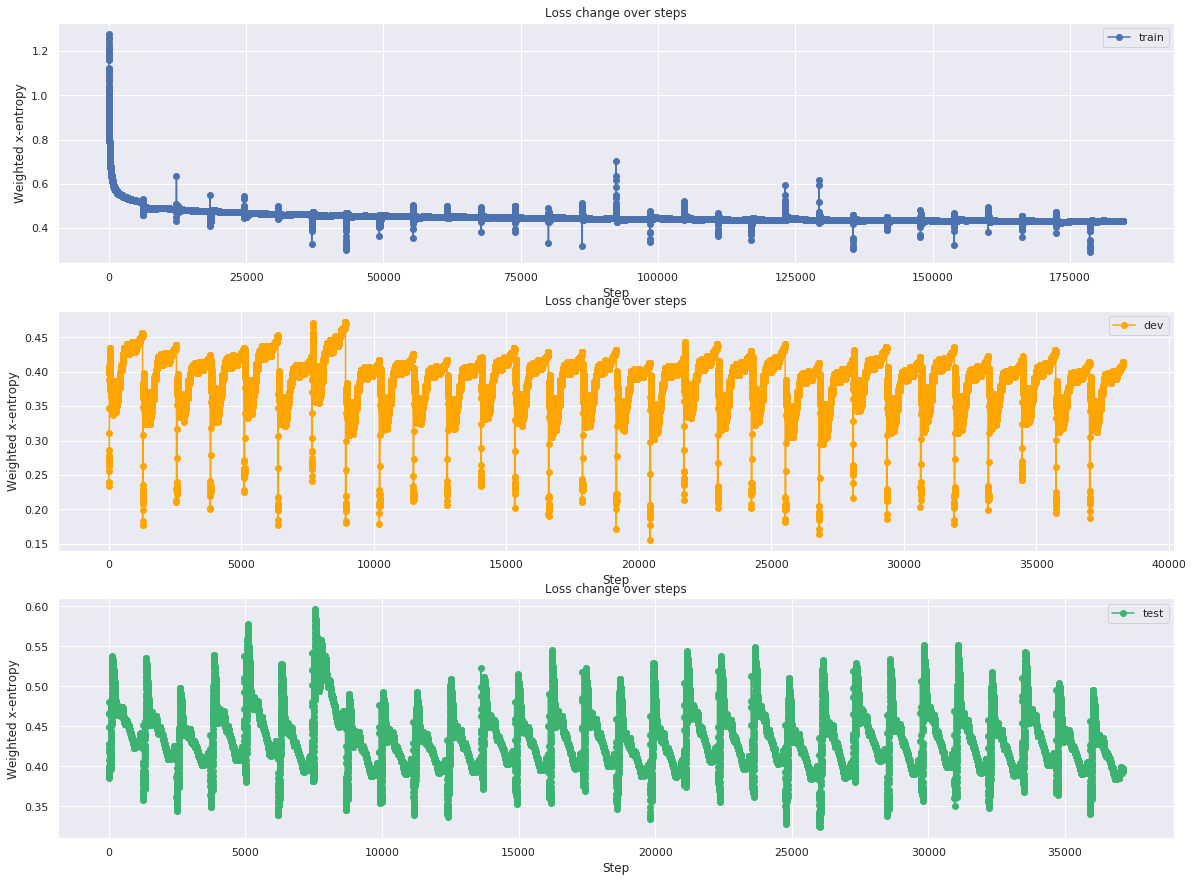

In [ ]:
fig, ax = plt.subplots(3,1,figsize=(20,15))

ax[0].plot(running_losses_df["train"], '-o', label="train")
ax[0].set_xlabel("Step")
ax[0].set_ylabel("Weighted x-entropy")
ax[0].set_title("Loss change over steps")
ax[0].legend();

ax[1].plot(running_losses_df["dev"], '-o', label="dev", color="orange")
ax[1].set_xlabel("Step")
ax[1].set_ylabel("Weighted x-entropy")
ax[1].set_title("Loss change over steps")
ax[1].legend();

ax[2].plot(running_losses_df["test"], '-o', label="test", color="mediumseagreen")
ax[2].set_xlabel("Step")
ax[2].set_ylabel("Weighted x-entropy")
ax[2].set_title("Loss change over steps")
ax[2].legend();

In [ ]:
def sigmoid(x):
    return 1./(1+np.exp(-x))

def evaluate_model(model, predictions_df, key):
    was_training = model.training
    model.eval()

    with torch.no_grad():
        for i, data in enumerate(dataloaders[key]):
            inputs = data["image"].to(device)
            labels = data["label"].to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            proba = outputs.cpu().numpy().astype(np.float)
            predictions_df.loc[i*BATCH_SIZE:(i+1)*BATCH_SIZE-1, "proba"] = sigmoid(proba[:, 1])
            predictions_df.loc[i*BATCH_SIZE:(i+1)*BATCH_SIZE-1, "true"] = data["label"].numpy().astype(np.int)
            predictions_df.loc[i*BATCH_SIZE:(i+1)*BATCH_SIZE-1, "predicted"] = preds.cpu().numpy().astype(np.int)
            predictions_df.loc[i*BATCH_SIZE:(i+1)*BATCH_SIZE-1, "x"] = data["x"].numpy()
            predictions_df.loc[i*BATCH_SIZE:(i+1)*BATCH_SIZE-1, "y"] = data["y"].numpy()
            predictions_df.loc[i*BATCH_SIZE:(i+1)*BATCH_SIZE-1, "patient_id"] = data["patient_id"]

    predictions_df = predictions_df.dropna()
    return predictions_df

In [ ]:
if run_training:
    dev_predictions = pd.DataFrame(index = np.arange(0, dataset_sizes["dev"]), columns = ["true", "predicted", "proba"])
    test_predictions = pd.DataFrame(index = np.arange(0, dataset_sizes["test"]), columns = ["true", "predicted", "proba"])

    dev_predictions = evaluate_model(model, dev_predictions, "dev")
    test_predictions = evaluate_model(model, test_predictions, "test")

    dev_predictions.to_csv("dev_predictions.csv", index=False)
    test_predictions.to_csv("test_predictions.csv", index=False)

else:

    dev_predictions = pd.read_csv(LOSSES_PATH + "dev_predictions.csv")
    test_predictions = pd.read_csv(LOSSES_PATH + "test_predictions.csv")

    dev_predictions.patient_id = dev_predictions.patient_id.astype(np.str)

In [ ]:
from sklearn.metrics import confusion_matrix

def get_confusion_matrix(y_true, y_pred):
    transdict = {1: "cancer", 0: "no cancer"}
    y_t = np.array([transdict[x] for x in y_true])
    y_p = np.array([transdict[x] for x in y_pred])

    labels = ["no cancer", "cancer"]
    index_labels = ["actual no cancer", "actual cancer"]
    col_labels = ["predicted no cancer", "predicted cancer"]
    confusion = confusion_matrix(y_t, y_p, labels=labels)
    confusion_df = pd.DataFrame(confusion, index=index_labels, columns=col_labels)
    for n in range(2):
        confusion_df.iloc[n] = confusion_df.iloc[n] / confusion_df.sum(axis=1).iloc[n]
    return confusion_df

**bold text**Kfold cross validation steps

In [ ]:
#implemtning k-fold cross validation
from sklearn.model_selection import KFold

patients = data.patient_id.unique()
k = 5 # number of folds
kfold = KFold(n_splits=k, shuffle=True, random_state=0)

for fold, (train_index, test_index) in enumerate(kfold.split(patients)):
    train_ids = patients[train_index]
    test_ids = patients[test_index]
    train_df = data.loc[data.patient_id.isin(train_ids),:].copy()
    test_df = data.loc[data.patient_id.isin(test_ids),:].copy()

    train_df = extract_coords(train_df)
    test_df = extract_coords(test_df)

In [ ]:
train_dataset = BreastCancerDataset(train_df, transform=my_transform(key="train"))
test_dataset = BreastCancerDataset(test_df, transform=my_transform(key="val"))

image_datasets = {"train": train_dataset, "test": test_dataset}
dataset_sizes = {x: len(image_datasets[x]) for x in ["train", "test"]}


train_transform = my_transform(key="train", plot=True)
val_transform = my_transform(key="val", plot=True)

train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, drop_last=False)

dataloaders = {"train": train_dataloader, "test": test_dataloader}

print(len(dataloaders["train"]), len(dataloaders["test"]))


In [ ]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
def train_loop(model, criterion, optimizer, lr_find=False, scheduler=None, num_epochs = 3, lam=0.0):
    since = time.time()
    if lr_find:
        phases = ["train"]
    else:
        phases = ["train", "test"]

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    loss_dict = {"train": [], "test": []}
    lam_tensor = torch.tensor(lam, device=device)

    running_loss_dict = {"train": [], "test": []}

    lr_find_loss = []
    lr_find_lr = []
    smoothing = 0.2

    kf = KFold(n_splits=k, random_state=0, shuffle=True)
    all_labels = []
    all_preds = []

    for fold, (train_index, test_index) in enumerate(kf.split(patients)):
        print(f'Fold {fold + 1}/{k}')
        train_ids, test_ids = patients[train_index], patients[test_index]

        for epoch in range(num_epochs):
            print('Epoch {}/{}'.format(epoch, num_epochs - 1))
            print('-' * 10)

            for phase in phases:
                if phase == "train":
                    model.train()
                else:
                    model.eval()

                running_loss = 0.0
                running_corrects = 0

                tk0 = tqdm(dataloaders[phase], total=int(len(dataloaders[phase])))

                counter = 0
                for bi, d in enumerate(tk0):
                    inputs = d["image"]

                    labels = d["label"]
                    inputs = inputs.to(device, dtype=torch.float)
                    labels = labels.to(device, dtype=torch.long)

                    # zero the parameter gradients
                    optimizer.zero_grad()

                    # forward
                    # track history if only in train

                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        # backward + optimize only if in training phase
                        if phase == 'train':
                            loss.backward()

                            optimizer.step()
                        if phase == 'test':
                            all_labels.extend(labels.cpu().numpy())
                            all_preds.extend(preds.cpu().numpy())


                            # cyclical lr schedule is invoked after each batch
                            if scheduler is not None:
                                scheduler.step()
                                if lr_find:
                                    lr_step = optimizer.state_dict()["param_groups"][0]["lr"]
                                    lr_find_lr.append(lr_step)
                                    if counter==0:
                                        lr_find_loss.append(loss.item())
                                    else:
                                        smoothed_loss = smoothing  * loss.item() + (1 - smoothing) * lr_find_loss[-1]
                                        lr_find_loss.append(smoothed_loss)

                # statistics
                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)

                    counter += 1


                    tk0.set_postfix({'loss': running_loss / (counter * dataloaders[phase].batch_size),
                                    'accuracy': running_corrects.double() / (counter * dataloaders[phase].batch_size)})
                    running_loss_dict[phase].append(running_loss / (counter * dataloaders[phase].batch_size))

            epoch_loss = running_loss / dataset_sizes[phase]
            loss_dict[phase].append(epoch_loss)
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            f1 = f1_score(all_labels, all_preds, average='macro')
            prec = precision_score(all_labels, all_preds, average='macro')
            rec = recall_score(all_labels, all_preds, average='macro')
            print('{} Loss: {:.4f} Acc: {:.4f} fold: {} f1: {} precision: {} recall: {}'.format(
                phase, epoch_loss, epoch_acc, fold, f1, prec, rec))



    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
    time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    results = {"model": model,
               "loss_dict": loss_dict,
               "running_loss_dict": running_loss_dict,
               "lr_find": {"lr": lr_find_lr, "loss": lr_find_loss}}
    return results

In [ ]:
if run_training:
    NUM_EPOCHS = 3
    optimizer = optim.SGD(model.fc.parameters(), lr=0.01)
    scheduler = get_scheduler(optimizer, start_lr, end_lr, 2*NUM_EPOCHS)
    results = train_loop(model, criterion, optimizer, scheduler=scheduler, num_epochs = NUM_EPOCHS)
    model, loss_dict, running_loss_dict = results["model"], results["loss_dict"], results["running_loss_dict"]

    if device == "cpu":
        OUTPUT_PATH += ".pth"
    else:
        OUTPUT_PATH += "_cuda.pth"

    torch.save(model.state_dict(), OUTPUT_PATH)

    losses_df = pd.DataFrame(loss_dict["train"],columns=["train"])
    losses_df.loc[:, "test"] = loss_dict["test"]
    losses_df.to_csv("losses_breastcancer.csv", index=False)

    running_losses_df = pd.DataFrame(running_loss_dict["train"], columns=["train"])
    running_losses_df.loc[0:len(running_loss_dict["test"])-1, "test"] = running_loss_dict["test"]
    running_losses_df.to_csv("running_losses_breastcancer.csv", index=False)
else:
    if device == "cpu":
        load_path = MODEL_PATH + ".pth"
    else:
        load_path = MODEL_PATH + "_cuda.pth"
    model.load_state_dict(torch.load(load_path, map_location='cpu'))
    model.eval()

    losses_df = pd.read_csv(LOSSES_PATH + "losses_breastcancer.csv")
    running_losses_df = pd.read_csv(LOSSES_PATH + "running_losses_breastcancer.csv")
